In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix seed for reproducibility
np.random.seed(100)

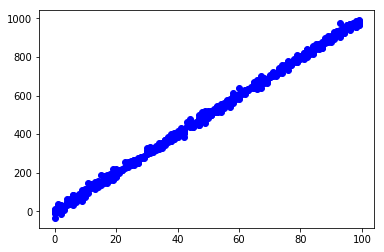

In [2]:
def generate_dataset():
    '''
    Function to generate the dataset for our problem
    Args:
        None
    Return:
        X: 
    '''
    N = 600
    X = np.random.randint(100, size=N)
    e = np.random.normal(0., 12., N)
    y = 10*X + e 
    
    return X, y

X, y = generate_dataset()
# visualizing the data
plt.plot(X, y, 'bo')
plt.show()


N = len(X)

# shuffling the dataset randomly
# X, y contains the data after shuffling randomly X and y
c=zip(X,y)
np.random.shuffle(c)
X, y = zip(*c)

# Created train and test set
training_size = int(0.8*N)

X_train = np.array(X[:training_size]).astype('float')
y_train = np.array(y[:training_size]).astype('float')
X_test = np.array(X[training_size:]).astype('float')
y_test = np.array(y[training_size:]).astype('float')

Starting Training with Gradient Descent
Loss fuction decrease after 10000 epochs of training


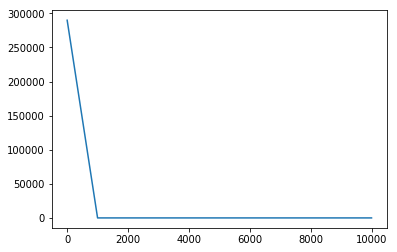

In [3]:
class LinearRegression(object):
    def __init__(self):
        #Initializing all parameters
        self.w = np.random.uniform(-1,1)
        self.b = np.random.uniform(-1,1)
    
    def forward(self, x):
        '''
            Args:
                self
                x : x
            Return:
                y: y = wx + b
        '''
        
        return self.w*x+self.b
        
        raise NotImplementedError
        
    
    def backward(self, x, ypred, y_train, lr):
        '''
            Computation of all gradients and updates the parameters w and b
            Args:
                x : x
                ypred: y=wx+b
                y_train = ground truth values
                lr = learning rate
        '''
        
        
        w_grad = -2*sum(x*(y_train-ypred))/len(x)
        b_grad = -2*sum(y_train-ypred)/len(x)
        
        self.w = self.w - lr*w_grad # Updating w
        self.b = self.b - lr*b_grad # Updating b

def MSELoss(y, ypred):
    '''
        Args:
            y: ground truth labels
            ypred: predicted labels
        Return:
            Mean squared error loss
    '''
    
    return sum((y-ypred)*(y-ypred))/len(y)
    
    raise NotImplementedError
        

print 'Starting Training with Gradient Descent'
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.00001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train)
    loss = MSELoss(y_train, ypred)
    if e==0 or (e+1)%1000==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
    
    lreg.backward(X_train, ypred, y_train, learning_rate)

print 'Loss fuction decrease after ' + str(epochs) + ' epochs of training'

#Ploting the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()

In [4]:
print 'Final Training loss:' + str()  # Printing training
print 'Starting to test'
ypred = lreg.forward(X_test) # finding predictions on test set 
loss = MSELoss(y_test, ypred)# computing loss on test set 
print 'Final test loss: ' + str(loss)

Final Training loss:
Starting to test
Final test loss: 139.99094252761336


Visualizing learnt function on test data


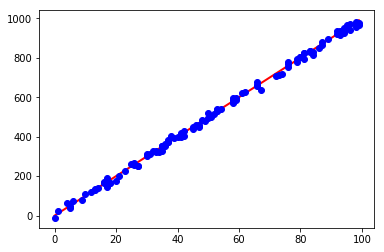

In [5]:
print 'Visualizing learnt function on test data'

x_ = np.arange(100)
y_ = lreg.w*x_ + lreg.b

plt.plot(x_, y_, 'r-', linewidth=2.0)
plt.plot(X_test, y_test, 'bo')
plt.show()